In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CBSAair = pd.read_csv("annual_aqi_by_cbsa_2017.csv")
TXair=CBSAair[CBSAair["CBSA"].str.contains(", TX")]
TXair = TXair.set_index('CBSA')


In [15]:
TXarea = pd.read_excel("land.xlsx")
TXarea = TXarea.set_index("CBSA")

In [19]:
TXrace = pd.read_csv("race.csv")
TXrace = TXrace.iloc[:,2:6]
TXrace = TXrace.drop([0,1],axis=0)
TXrace = TXrace.drop(["HD02_VD01"], axis =1)
TXrace.columns = ["Geography", "Population", "White"]
TXrace["Geography"] = TXrace["Geography"].str.split(' ').str[0:-3].str.join(' ')
TXrace = TXrace.set_index('Geography')
TXdemo = TXarea.join(TXrace)
TXdemo = TXdemo.astype('int64')
TXdemo["Density"] = TXdemo["Population"]/TXdemo["Area"]

In [25]:
TX = TXdemo.join(TXair)

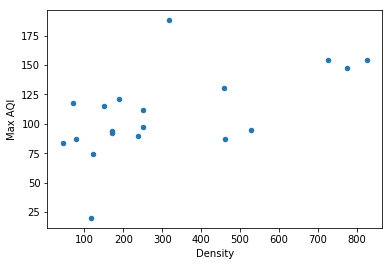

In [26]:
TX.plot(x = "Density", y = "Max AQI", kind = 'scatter')#plt.ylabel('some numbers')
plt.show()

In [30]:
TX.corr()["Density"]["Max AQI"]

0.57799615882837174